# Chapter 1-4. Approximate reasoning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

/Users/yukoga/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [41]:
N_steps = 10  # Number of samples
N_dim = 3    # Number of dimensions
FIGSIZE = (16, 9)

## Markov chain 

Let's say there are three cities - i.e. city A, city B and city C.  Residents in cities will move to another city with some probabilities based on where they live per each month.  
We have a probabilistic variable $Z^{t}$, which value will be either A, B or C.  
Then, residents who live in city A will move to A (i.e. stay in A), B, and C with following probabilities :  

$$
\begin{equation*}
\begin{aligned}

p(Z^{(t)}=A|Z^{(t-1)}=A) &= 0.2  \\
p(Z^{(t)}=B|Z^{(t-1)}=A) &= 0.3  \\
p(Z^{(t)}=C|Z^{(t-1)}=A) &= 0.5

\end{aligned}
\end{equation*}
$$

Residents who live in B and C also move likewise. Then the transition probability can be represented as matrix as follows:  

$$
\begin{equation*}
\begin{aligned}
T &= 
\begin{pmatrix}
0.2 & 0.1 & 0.1 \\
0.3 & 0.5 & 0.3 \\
0.5 & 0.4 & 0.6
\end{pmatrix}
\end{aligned}
\end{equation*}
$$

where $T_{ij}$ means residents who live in city $j$ at time $t-1$ will move to city $i$ with probability $T_{ij}$ at time $t$.

Then let's take a look how the probablities of residents evolve along as time goes.  
We're going to start from the initial state $\pi^{(0)} = (0.6, 0.4, 0.1)^\top$. 

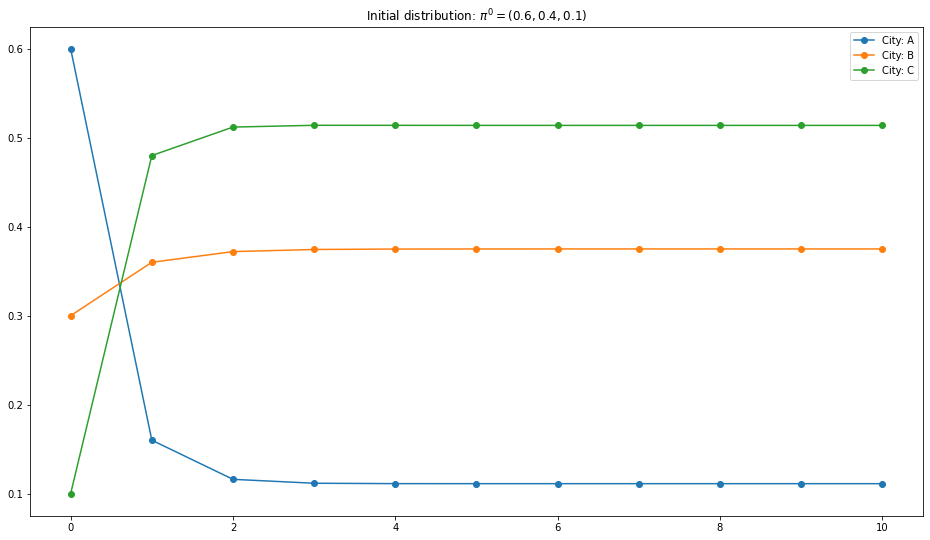

In [48]:
cities = ['A', 'B', 'C']
T = np.matrix([[0.2, 0.1, 0.1],
                [0.3, 0.5, 0.3],
                [0.5, 0.4, 0.6]])
pi = np.array([0.6, 0.3, 0.1])

for i in range(N_steps):
    pi = np.append(pi, np.dot(T, pi[-N_dim:]).T)
pi = pi.reshape((N_steps + 1, N_dim))

x = np.arange(N_steps + 1)
plt.figure(figsize=FIGSIZE)
for i in range(N_dim):
    plt.plot(x, pi[:, i], marker='o', label=f'City: {cities[i]}')

plt.title(f'Initial distribution: $\pi^{(0)} = (0.6, 0.4, 0.1)$')
plt.legend()
plt.show()

What if we start from the initial state $\pi^{(0)} = (0.0, 0.9, 0.1)^\top$ ?

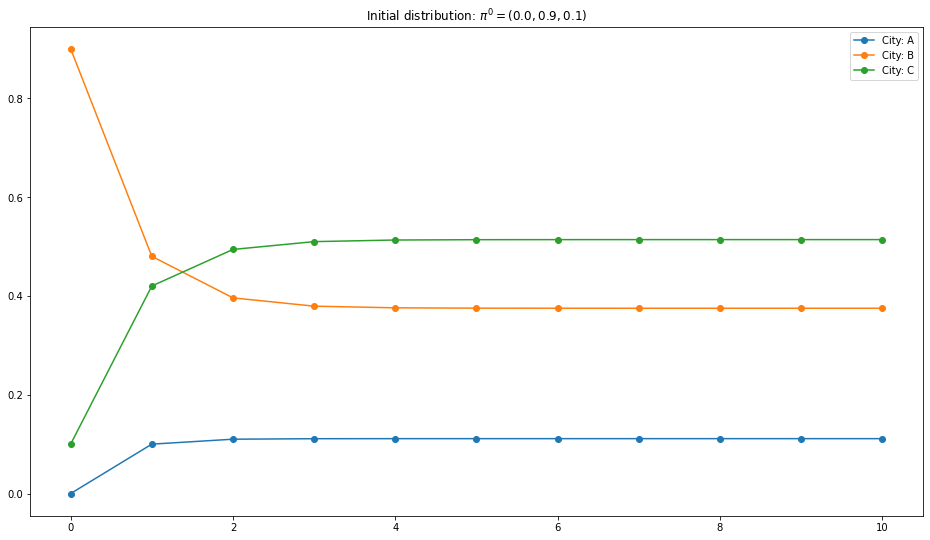

In [50]:
pi = np.array([0.0, 0.9, 0.1])

for i in range(N_steps):
    pi = np.append(pi, np.dot(T, pi[-N_dim:]).T)
pi = pi.reshape((N_steps + 1, N_dim))

x = np.arange(N_steps + 1)
plt.figure(figsize=FIGSIZE)
for i in range(N_dim):
    plt.plot(x, pi[:, i], marker='o', label=f'City: {cities[i]}')

plt.title(f'Initial distribution: $\pi^{(0)} = (0.0, 0.9, 0.1)$')
plt.legend()
plt.show()